# Bayesian Monthly Sensitivity Model

In [2]:
import pandas as pd
import pylab as plt
import numpy as np
import seaborn as sns
import nest_asyncio
nest_asyncio.apply()
import stan


%matplotlib inline

In [4]:
states=['Alberta','Manitoba']

In [5]:
temp_states=[]
for i,s in enumerate(states):
    wheat_temp=pd.read_table('./Crop_data_files/wheat_met_anoms/Wheat_Spring_Canada_'+s+'_temp_anom_real.csv')
    wheat_temp.rename(columns = {'Unnamed: 0':'Year'}, inplace = True)
    temp_states.append(wheat_temp)
temp_states=pd.concat(temp_states,keys=states)

In [6]:
temp_states.shape

(70, 13)

In [7]:
# gives the temp anomalies by year/month
temp_states.head()

Year        Jan       Feb       Mar       Apr       May       Jun  \
Alberta 0  1980  -4.558863 -0.574979 -2.798692  4.118739  1.562480  0.240780   
        1  1981   6.194938  2.457207  3.895042  1.024020  0.827557 -1.421037   
        2  1982 -10.900981 -4.814200 -3.396243 -3.497221 -0.900914  0.349226   
        3  1983   2.506302  3.366720  0.371425 -0.064983 -0.287808  0.113660   
        4  1984   3.102367  6.406299  0.304728  1.422145 -0.922846  0.083128   

                Jul       Aug       Sep       Oct       Nov       Dec  
Alberta 0 -0.367725 -2.662456 -0.560231  1.883408  3.998546 -2.773745  
        1 -0.478416  2.087318  1.353523 -0.200117  4.931022 -0.090454  
        2 -0.682542 -1.136625 -0.232160  0.839836 -3.030403  1.558304  
        3 -0.173004  2.217630 -1.737185  1.387547  1.425035 -9.816836  
        4  0.487475  1.637315 -3.159880 -2.961023 -2.889469 -5.568326

In [9]:
# Compile model
with open('stan/BMSM-simp.stan', 'r') as f:
    model = f.read()
# sm = stan.build(f, data=data)


In [8]:
yields=pd.read_table('Crop_data_files/Wheat_median_yield_anoms.csv')

In [10]:
yields.shape

(51, 58)

In [11]:
yields.iloc[:,22:].head()

,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,0.06,0.20,-0.26,0.21,0.41,0.00,0.00,-1.07,-0.47,0.34,...,0.00,0.00,0.50,0.00,-0.98,0.00,0.00,0.06,0.070,-0.10
1,0.00,0.00,0.00,0.47,0.20,-0.14,0.14,-0.87,-0.34,0.27,...,-0.07,0.21,0.14,0.00,-0.74,-0.06,0.00,0.74,0.100,-0.20
2,0.20,0.00,-0.20,0.54,0.94,-0.27,0.20,-1.01,0.00,0.74,...,0.00,0.21,0.00,0.00,-0.61,0.13,0.00,-0.13,0.140,0.00
3,0.00,0.33,0.07,-0.64,-1.08,0.64,0.27,-0.87,0.00,-0.20,...,-0.06,0.00,0.00,0.48,-0.14,-0.13,0.27,0.00,-0.305,0.07
4,-0.47,0.20,0.74,0.00,-0.74,0.00,0.67,0.00,-0.40,0.00,...,-0.27,-0.07,0.00,0.13,0.47,-0.07,0.07,0.00,-0.435,0.74


In [74]:
yields.head()

,Unnamed: 0,Region,1961,1962,1963,1964,1965,1966,1967,1968,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,0,Wheat_Spring_USA_NorthDakota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.50,0.00,-0.98,0.00,0.00,0.06,0.070,-0.10
1,1,Wheat_Spring_USA_SouthDakota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.07,0.21,0.14,0.00,-0.74,-0.06,0.00,0.74,0.100,-0.20
2,2,Wheat_Spring_USA_Minnesota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.21,0.00,0.00,-0.61,0.13,0.00,-0.13,0.140,0.00
3,3,Wheat_Spring_USA_Montana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.06,0.00,0.00,0.48,-0.14,-0.13,0.27,0.00,-0.305,0.07
4,4,Wheat_Spring_USA_Idaho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.27,-0.07,0.00,0.13,0.47,-0.07,0.07,0.00,-0.435,0.74


In [ ]:
# TO DO: GET DATA
# start with one location/one weather
#  calculate the yield anomily per year per location from Allcult.csv
#  weather  - average the anomily over the month
#  np.arrays of the right shape for d_temp and d_yields

In [12]:
n_years=np.array(yields[yields['Region']=='Wheat_Spring_Canada_Alberta'].iloc[0,23:]).size
data={
    'n_regions':2,
    'n_years':n_years,
    'd_temp':np.array(temp_states.iloc[:,1:]).reshape(len(states),int(np.array(temp_states.iloc[:,1:]).shape[0]/len(states)),12),
    'd_yields':np.array(yields[yields["Region"].isin(['Wheat_Spring_Canada_'+s for s in states])].iloc[:,23:]).astype(float)
}

In [15]:
# n_years
# data['d_temp'].shape
temp_states.iloc[:,1:]

Jan       Feb       Mar       Apr       May       Jun  \
Alberta  0   -4.558863 -0.574979 -2.798692  4.118739  1.562480  0.240780   
         1    6.194938  2.457207  3.895042  1.024020  0.827557 -1.421037   
         2  -10.900981 -4.814200 -3.396243 -3.497221 -0.900914  0.349226   
         3    2.506302  3.366720  0.371425 -0.064983 -0.287808  0.113660   
         4    3.102367  6.406299  0.304728  1.422145 -0.922846  0.083128   
...                ...       ...       ...       ...       ...       ...   
Manitoba 30   1.557544 -0.887460  4.940868  3.157253 -0.543598 -0.336449   
         31  -2.278410 -1.839722 -3.848011 -0.993598 -0.847159  0.207856   
         32   4.810616  3.856552  6.696579  1.395884  0.581980  1.026793   
         33  -0.808215  0.436829 -5.164640 -5.923650  0.018805  0.284077   
         34  -1.961548 -6.330203 -5.050094 -3.035383 -0.390495 -0.441368   

                  Jul       Aug       Sep       Oct       Nov       Dec  
Alberta  0  -0.367725 -2.662456 -0.560231  1.883408  3.998546 -2.773745  
         1  -0.478416  2.087318  1.353523 -0.200117  4.931022 -0.090454  
         2  -0.682542 -1.136625 -0.232160  0.839836 -3.030403  1.558304  
         3  -0.173004  2.217630 -1.737185  1.387547  1.425035 -9.816836  
         4   0.487475  1.637315 -3.159880 -2.961023 -2.889469 -5.568326  
...               ...       ...       ...       ...       ...       ...  
Manitoba 30 -0.127990  0.418606 -1.501435  2.700117  0.582945 -0.991773  
         31  1.153139  1.268239  1.580348  3.075179  1.834650  5.208262  
         32  2.506654  0.125219  0.460480 -1.666039 -1.480355 -1.786686  
         33 -0.750274  0.332055  2.822316 -0.836977 -1.112143 -6.764350  
         34 -1.010665  0.413526  0.244451  1.455376 -4.317085  4.174258  

[70 rows x 12 columns]

In [77]:
yields[yields["Region"].isin(['Wheat_Spring_Canada_'+s for s in states])].iloc[:,23:]

,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
13,0.20,-0.28,-0.11,0.57,0.11,0.0,-0.8,0.0,0.5,0.0,...,-0.2,0.4,0.5,-0.3,-0.5,0.0,0.5,0.0,-0.05,0.1
15,-0.02,0.02,-0.48,-0.23,0.40,-0.1,-0.1,0.0,0.2,0.2,...,-0.2,0.3,-0.3,-0.1,0.1,-0.1,0.6,0.0,-0.40,0.2


In [78]:
sm = stan.build(model, data=data)

Building...



Building: found in cache, done.Messages from stanc:
Warning in '/var/folders/m7/fqkk2h3d5rlbg6_z4yfy3dc4000z5d/T/httpstan_8ls7lxt3/model_2wdzshqy.stan', line 28, column 24: Argument 100.0 suggests there may be parameters that are not unit scale; consider rescaling with a multiplier (see manual section 22.12).


In [79]:
type(sm)

stan.model.Model

In [80]:
fit=sm.sample(num_chains=4,num_samples=1000)
type(fit)

Sampling:   0%
Sampling:   1% (100/8000)
Sampling:   4% (300/8000)
Sampling:   6% (500/8000)
Sampling:  10% (800/8000)
Sampling:  19% (1500/8000)
Sampling:  28% (2200/8000)
Sampling:  50% (4000/8000)
Sampling:  71% (5700/8000)
Sampling:  86% (6900/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/8000), done.
Messages received during sampling:
  Gradient evaluation took 0.000241 seconds
  1000 transitions using 10 leapfrog steps per transition would take 2.41 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000227 seconds
  1000 transitions using 10 leapfrog steps per transition would take 2.27 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000223 seconds
  1000 transitions using 10 leapfrog steps per transition would take 2.23 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.00081 seconds
  1000 transitions using 10 leapfrog steps per transition would take 8.1 seconds.
  Adjust your expectatio

stan.fit.Fit

In [81]:
df = fit.to_frame()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
parameters,,,,,,,,
lp__,4000.0,-14.032831,3.485864,-29.186469,-16.211249,-13.647783,-11.533290,-4.931430
accept_stat__,4000.0,0.883672,0.109542,0.301341,0.828296,0.913526,0.970498,1.000000
stepsize__,4000.0,0.395279,0.025723,0.365790,0.380986,0.389495,0.403789,0.436336
treedepth__,4000.0,3.464500,0.499302,3.000000,3.000000,3.000000,4.000000,5.000000
n_leapfrog__,4000.0,12.308000,4.124729,7.000000,7.000000,15.000000,15.000000,55.000000
...,...,...,...,...,...,...,...,...
d_yields_pred.1.34,4000.0,0.079174,1.129109,-4.045244,-0.683458,0.090739,0.836287,3.814348
d_yields_pred.2.34,4000.0,-0.321861,1.205545,-4.527034,-1.133014,-0.341419,0.495745,3.686884
d_yields_pred.1.35,4000.0,-0.036054,1.144655,-4.479515,-0.803341,-0.049165,0.734818,4.218642


In [136]:
list(df.columns)

['lp__',
 'accept_stat__',
 'stepsize__',
 'treedepth__',
 'n_leapfrog__',
 'divergent__',
 'energy__',
 's_temp.1.1',
 's_temp.2.1',
 's_temp.1.2',
 's_temp.2.2',
 's_temp.1.3',
 's_temp.2.3',
 's_temp.1.4',
 's_temp.2.4',
 's_temp.1.5',
 's_temp.2.5',
 's_temp.1.6',
 's_temp.2.6',
 's_temp.1.7',
 's_temp.2.7',
 's_temp.1.8',
 's_temp.2.8',
 's_temp.1.9',
 's_temp.2.9',
 's_temp.1.10',
 's_temp.2.10',
 's_temp.1.11',
 's_temp.2.11',
 's_temp.1.12',
 's_temp.2.12',
 'd_yields_pred.1.1',
 'd_yields_pred.2.1',
 'd_yields_pred.1.2',
 'd_yields_pred.2.2',
 'd_yields_pred.1.3',
 'd_yields_pred.2.3',
 'd_yields_pred.1.4',
 'd_yields_pred.2.4',
 'd_yields_pred.1.5',
 'd_yields_pred.2.5',
 'd_yields_pred.1.6',
 'd_yields_pred.2.6',
 'd_yields_pred.1.7',
 'd_yields_pred.2.7',
 'd_yields_pred.1.8',
 'd_yields_pred.2.8',
 'd_yields_pred.1.9',
 'd_yields_pred.2.9',
 'd_yields_pred.1.10',
 'd_yields_pred.2.10',
 'd_yields_pred.1.11',
 'd_yields_pred.2.11',
 'd_yields_pred.1.12',
 'd_yields_pred.2.1

In [82]:
fit.keys()
# sampler_params = fit['d_yields_pred']
# where has d_yields gone?

KeysView(<stan.Fit>
Parameters:
    s_temp: (2, 12)
    d_yields_pred: (2, 35)
    tmp: ()
Draws: 4000)

In [83]:
fit['d_yields_pred']

array([[[ 1.54088381e+00,  1.83308149e+00, -1.10831088e+00, ...,
          1.56279019e+00, -1.24988209e-01,  8.41080675e-01],
        [ 4.57271828e-01,  9.84449221e-02,  1.96914866e+00, ...,
          1.15024280e+00,  1.35058823e+00,  1.67922746e-01],
        [-1.56944411e+00,  1.12851128e+00,  4.24078558e-01, ...,
         -1.24576169e+00,  2.61260016e-02, -8.33631369e-01],
        ...,
        [-9.19622743e-01, -2.76566265e-01,  2.03959571e+00, ...,
          6.95331930e-01,  1.23056420e-01,  7.29012382e-01],
        [-2.02988287e-01, -1.06733476e+00, -1.23185958e+00, ...,
         -1.87270001e+00,  7.12722974e-01,  1.11536557e+00],
        [ 8.13943619e-01, -1.47632173e-01, -9.40482631e-01, ...,
         -1.74756216e+00, -1.05940703e+00, -1.57751968e+00]],

       [[ 6.35593494e-01, -1.43668669e+00,  1.48146421e+00, ...,
         -3.84464047e-01, -5.65771966e-02,  3.12431280e-01],
        [ 3.73007984e-01, -1.92870031e+00, -8.08655863e-02, ...,
          2.65613275e-01,  9.81851497e

In [84]:
dir(fit)

['__abstractmethods__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_draws',
 '_parameter_indexes',
 'constrained_param_names',
 'dims',
 'get',
 'items',
 'keys',
 'num_chains',
 'num_samples',
 'num_thin',
 'num_warmup',
 'param_names',
 'sample_and_sampler_param_names',
 'save_warmup',
 'stan_outputs',
 'to_frame',
 'values']

In [137]:
fit.sample_and_sampler_param_names

('lp__',
 'accept_stat__',
 'stepsize__',
 'treedepth__',
 'n_leapfrog__',
 'divergent__',
 'energy__')

In [138]:
fit.param_names

('s_temp', 'd_yields_pred', 'tmp')

In [85]:
x= fit['treedepth__']
for y in x:
    print(sum(x)>0) # [ True  True  True ...  True  True  True]


[ True  True  True ...  True  True  True]


In [86]:
# from https://github.com/grburgess/stan_utility/blob/master/stan_utility/utils.py
def check_div(fit, quiet=False):
    """Check transitions that ended with a divergence"""
    # sampler_params = fit.sample_and_sampler_param_names
    # divergent = [x for y in sampler_params for x in y["divergent__"]]
    divergent = fit["divergent__"][0]
    n = sum(divergent)
    N = len(divergent)

    if not quiet and n > 0:
        print(
            "{} of {} iterations ended with a divergence ({}%)".format(
                n, N, 100 * n / N
            )
        )
        # return 'jokes'

    if n > 0:
        if not quiet:
            print("  Try running with larger adapt_delta to remove the divergences")
            # return 'here'
        else:
            return False
    else:
        if quiet:
            return True
        # else:
        #     return 'silly'


def check_treedepth(fit, max_treedepth=10, quiet=False):
    """Check transitions that ended prematurely due to maximum tree depth limit"""
    # depths = [x for y in sampler_params for x in y["treedepth__"]]
    depths = fit['treedepth__'][0]
    n = sum(1 for x in depths if x == max_treedepth)
    N = len(depths)

    if not quiet and n > 0:
        print(
            (
                "{} of {} iterations saturated the maximum tree depth of {}" + " ({}%)"
            ).format(n, N, max_treedepth, 100 * n / N)
        )
    if n > 0:
        if not quiet:
            print(
                "  Run again with max_treedepth set to a larger value to avoid saturation"
            )
        else:
            return False
    else:
        if quiet:
            return True


def check_energy(fit, quiet=False):
    """Checks the energy fraction of missing information (E-FMI)"""
    # sampler_params = fit
    no_warning = True
    for chain_num, energies in enumerate(fit['energy__']):
        # energies = s["energy__"]
        numer = sum(
            (energies[i] - energies[i - 1]) ** 2 for i in range(1, len(energies))
        ) / len(energies)
        denom = np.var(energies)
        if numer / denom < 0.2:
            if not quiet:
                print("Chain {}: E-BFMI = {}".format(chain_num, numer / denom))
            no_warning = False

    if no_warning:
        if quiet:
            return True
    else:
        if not quiet:
            print(
                "  E-BFMI below 0.2 indicates you may need to reparameterize your model"
            )
        else:
            return False


In [87]:
# carry out some diagnostic checks on fit
# import stan_utility
check_div(fit)
check_energy(fit)
check_treedepth(fit)

In [88]:
fit.keys

<bound method Mapping.keys of <stan.Fit>
Parameters:
    s_temp: (2, 12)
    d_yields_pred: (2, 35)
    tmp: ()
Draws: 4000>

In [89]:
posterior = stan.build(model, data=data, random_seed=5)
pfit = posterior.sample(num_chains=4, num_samples=150)

Building...



Building: found in cache, done.Messages from stanc:
Warning in '/var/folders/m7/fqkk2h3d5rlbg6_z4yfy3dc4000z5d/T/httpstan_8ls7lxt3/model_2wdzshqy.stan', line 28, column 24: Argument 100.0 suggests there may be parameters that are not unit scale; consider rescaling with a multiplier (see manual section 22.12).
Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 7.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.71 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 6.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.66 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 6.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.62 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.49 s

In [90]:
pfit.keys()

KeysView(<stan.Fit>
Parameters:
    s_temp: (2, 12)
    d_yields_pred: (2, 35)
    tmp: ()
Draws: 600)

In [91]:
# fit['s_temp'].shape # (2, 12, 4000)
fit['s_temp'].T.shape # (4000, 12, 2)
fit['d_yields_pred'].shape # (2, 35, 4000)

(2, 35, 4000)

In [92]:

{k:v for k,v in fit.items()}.keys()

dict_keys(['s_temp', 'd_yields_pred', 'tmp'])

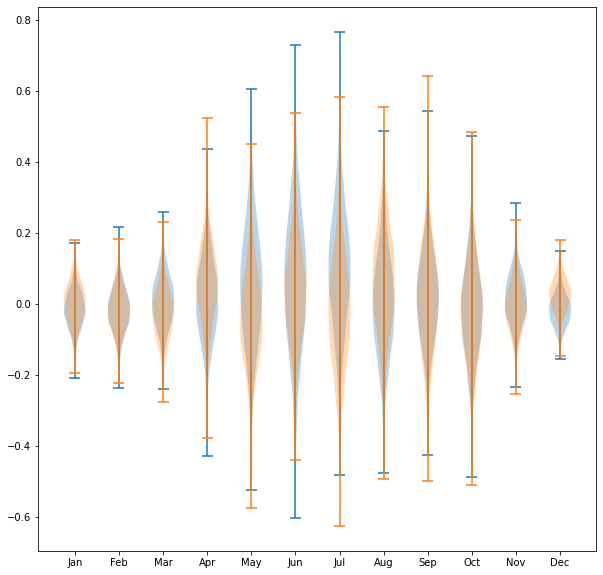

In [93]:
# changes samples to fit (shape 35,4000) not right
plt.figure(figsize=(10,10))
# plt.violinplot(fit['s_temp'].T[:,0,:]);
plt.violinplot(fit['s_temp'].T[:,:,0]);
# plt.violinplot(fit['s_temp'].T[:,1,:]);
plt.violinplot(fit['s_temp'].T[:,:,1]);
plt.xticks(range(1,13),wheat_temp.columns[1:]);


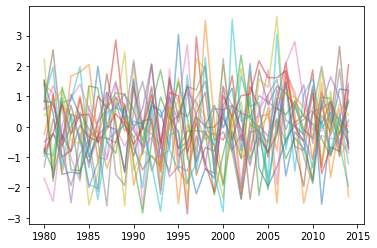

In [94]:
for s in range(0,4000,200):  # changed from 2000 to 600 for wheat  what is s, just a sample of the sample yield predictions?
    plt.plot(range(1980,2015),fit['d_yields_pred'].T[s,:,0].T,alpha=0.5)

In [95]:

'''
INvestigation
'''
# for s in range(0,2000,100):
fit['d_yields_pred'].T[599,:,0] #shape is (600,35,2)

array([ 0.51052483, -1.74263848, -1.01088034,  0.7352297 ,  1.67735328,
        0.28645156, -0.98490011,  1.51170648, -0.23198035,  0.00565775,
       -2.04082713, -0.38324707, -2.7035982 ,  1.26825777, -0.77402133,
        0.31670411,  1.08620078,  0.06845404,  1.07508806, -1.92344693,
       -0.68759142,  0.9757343 , -1.05048518, -0.9683349 , -0.32427073,
       -0.40325483,  0.62120506, -0.21837193, -0.95314171, -0.26032657,
        1.12459337,  0.71459718, -0.23363431,  0.24094911,  0.92243474])

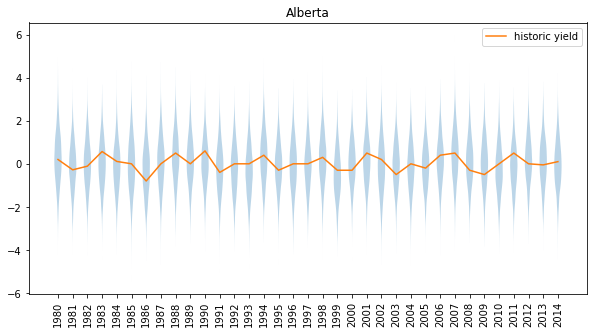

In [96]:
plt.figure(figsize=(10,5))
# plt.violinplot(fit['d_yields_pred'][:,0,:].T,showextrema=False); transpose the d_yields_pred and change the slice (0 to the end because thats where the index is only 2)
plt.violinplot(fit['d_yields_pred'].T[:,:,0],showextrema=False);
plt.xticks(range(1,36),np.arange(1980,2015),rotation=90);
plt.plot(range(1,36),data['d_yields'][0,:], label='historic yield')
plt.title(states[0])
plt.legend()


No handles with labels found to put in legend.


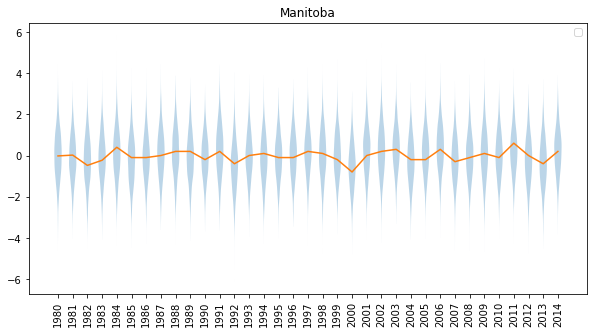

In [97]:

plt.figure(figsize=(10,5))
plt.violinplot(fit['d_yields_pred'].T[:,:,1],showextrema=False);
plt.xticks(range(1,36),np.arange(1980,2015),rotation=90);
plt.plot(range(1,36),data['d_yields'][1,:])
plt.title(states[1])
plt.legend()


In [98]:
type(data['d_yields'])

numpy.ndarray

In [99]:
data['d_yields'].shape

(2, 35)